In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!cp '/content/drive/MyDrive/tmp/data.zip' ./

In [7]:
!ls -al

total 121844
drwxr-xr-x 1 root root      4096 Nov 26 06:45 .
drwxr-xr-x 1 root root      4096 Nov 26 06:39 ..
drwxr-xr-x 1 root root      4096 Nov 20 17:15 .config
-rw------- 1 root root 124741357 Nov 26 06:46 data.zip
drwx------ 6 root root      4096 Nov 26 06:45 drive
drwxr-xr-x 1 root root      4096 Nov 13 17:33 sample_data


In [8]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/test/
   creating: data/train/
   creating: data/test/advanced/
   creating: data/test/early/
  inflating: data/test/.DS_Store     
  inflating: __MACOSX/data/test/._.DS_Store  
   creating: data/test/normal/
   creating: data/train/advanced/
   creating: data/train/early/
  inflating: data/train/.DS_Store    
  inflating: __MACOSX/data/train/._.DS_Store  
   creating: data/train/normal/
  inflating: data/test/advanced/348.png  
  inflating: __MACOSX/data/test/advanced/._348.png  
  inflating: data/test/advanced/412.png  
  inflating: __MACOSX/data/test/advanced/._412.png  
  inflating: data/test/advanced/374.png  
  inflating: __MACOSX/data/test/advanced/._374.png  
  inflating: data/test/advanced/360.png  
  inflating: __MACOSX/data/test/advanced/._360.png  
  inflating: data/test/advanced/406.png  
  inflating: __MACOSX/data/test/advanced/._406.png  

In [9]:
!ls -al

total 121852
drwxr-xr-x 1 root root      4096 Nov 26 06:46 .
drwxr-xr-x 1 root root      4096 Nov 26 06:39 ..
drwxr-xr-x 1 root root      4096 Nov 20 17:15 .config
drwxr-xr-x 4 root root      4096 Nov 26 04:36 data
-rw------- 1 root root 124741357 Nov 26 06:46 data.zip
drwx------ 6 root root      4096 Nov 26 06:45 drive
drwxr-xr-x 3 root root      4096 Nov 26 06:46 __MACOSX
drwxr-xr-x 1 root root      4096 Nov 13 17:33 sample_data


In [10]:
!ls -al data

total 24
drwxr-xr-x 4 root root 4096 Nov 26 04:36 .
drwxr-xr-x 1 root root 4096 Nov 26 06:46 ..
-rw-r--r-- 1 root root 6148 Nov 26 04:36 .DS_Store
drwxr-xr-x 5 root root 4096 Nov 26 04:36 test
drwxr-xr-x 5 root root 4096 Nov 26 04:36 train


# by ResNet

In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "data/train",   # <--------------------------------------
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "data/test",   # <--------------------------------------
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64,  
      validation_steps=test_data_generator.samples/64,      
      epochs=10
)

loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/64
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


94773248/94765736 [==============================] - 0s 0us/step
Found 771 images belonging to 3 classes.
Found 773 images belonging to 3 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
13/12 [================================] - 15s 1s/step - loss: 222.6868 - acc: 0.4968 - val_loss: 22.7146 - val_acc: 0.5938
Epoch 2/10
13/12 [================================] - 15s 1s/step - loss: 23.2085 - acc: 0.7328 - val_loss: 14.7720 - val_acc: 0.6494
Epoch 3/10
13/12 [================================] - 15s 1s/step - loss: 30.0983 - acc: 0.6861 - val_loss: 42.9183 - val_acc: 0.5369
Epoch 4/10
13/12 [================================] - 15s 1s/step - loss: 16.6768 - acc: 0.7419 - val_loss: 23.4295 - val_acc: 0.5705
Epoch 5/10
13/12 [================================] - 15s 1s/step - loss: 10.5347 - acc: 0.7665 - val_loss: 33.8283 - val_acc: 0.5938
Epoch 6/10
13/12 [================================] - 15s 1s/step - loss: 10.3005 - acc: 0.7367 - val_loss

# by DenseNet

In [11]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



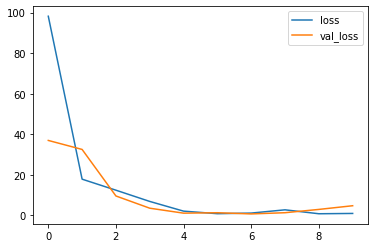

loss =  0.9686822295188904 , val_loss =  4.769455909729004
13/12 [================================] - 12s 927ms/step - loss: 0.9687 - acc: 0.7147 - val_loss: 4.7695 - val_acc: 0.3687
Instructions for updating:
Please use Model.evaluate, which supports generators.
loss= 4.769455909729004
acc= 0.36869341135025024
Instructions for updating:
Please use Model.predict, which supports generators.
1 early


In [13]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications import resnet50
# from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import densenet # <------------------
from tensorflow.keras.applications import DenseNet121 # <------------------


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax')) # <------------------

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=densenet.preprocess_input    # <--------------------------------------
).flow_from_directory(
      "data/train",   
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=densenet.preprocess_input   # <--------------------------------------
).flow_from_directory(
      "data/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

plot_losses = PlotLosses()     # <--------------------------------------

model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64,  
      validation_steps=test_data_generator.samples/64,      
      epochs=10,     # <--------------------------------------
      callbacks=[plot_losses]     # <--------------------------------------
)

loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/64
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


# by normal CNN

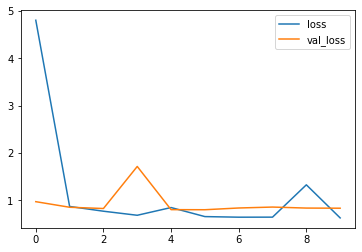

loss =  0.631060004234314 , val_loss =  0.8357013463973999
13/12 [================================] - 11s 863ms/step - loss: 0.6311 - acc: 0.7354 - val_loss: 0.8357 - val_acc: 0.5731
loss= 0.8357014060020447
acc= 0.5730918645858765
0 advanced


In [19]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications import resnet50
# from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications import DenseNet121

import keras    # <--------------------------------------
from tensorflow.keras.layers import *     # <--------------------------------------


model = keras.Sequential()
model.add(Input((224,224,3)))    # <--------------------------------------
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))    # <--------------------------------------


model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])

def my_preprocess_input(image):    # <--------------------------------------
  return image/255.0               # <--------------------------------------

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=my_preprocess_input    # <--------------------------------------
).flow_from_directory(
      "data/train",   
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=my_preprocess_input   # <--------------------------------------
).flow_from_directory(
      "data/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

plot_losses = PlotLosses()

model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64,  
      validation_steps=test_data_generator.samples/64,      
      epochs=10,
      callbacks=[plot_losses]
)

loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/64
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])
